In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/11_chrun_prediction/customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.drop('customerID',axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape          # number of blank values 

(11, 20)

In [10]:
df.shape         # 11 out of 7k+ values are null and you can drop the values

(7043, 20)

In [11]:
df.iloc[488]
df.iloc[488].TotalCharges

' '

In [12]:
df1 = df[df.TotalCharges != ' ']

In [13]:
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
# df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [17]:
df2 = df1.copy()
df2['TotalCharges'] = pd.to_numeric(df1.TotalCharges)

In [18]:
df2.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [19]:
df2.TotalCharges.dtypes

dtype('float64')

In [20]:
tenure_churn_no = df2[df2.Churn == 'No'].tenure
tenure_churn_yes = df2[df2.Churn=='Yes'].tenure

Text(0, 0.5, 'number of customers')

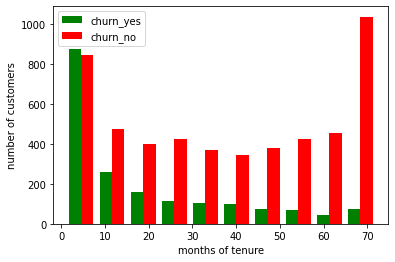

In [21]:
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['churn_yes', 'churn_no'])
plt.legend()
plt.xlabel('months of tenure')
plt.ylabel('number of customers')

Text(0, 0.5, 'number of customers')

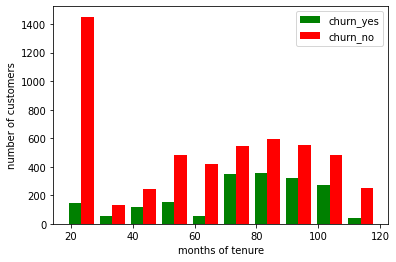

In [22]:
tenure_churn_no = df2[df2.Churn == 'No'].MonthlyCharges
tenure_churn_yes = df2[df2.Churn=='Yes'].MonthlyCharges
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['churn_yes', 'churn_no'])
plt.legend()
plt.xlabel('months of tenure')
plt.ylabel('number of customers')

In [23]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [24]:
print_unique_col_values(df2)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [25]:
df2.replace('No internet service', 'No', inplace=True)
df2.replace('No phone service', 'No', inplace=True)

In [26]:
print_unique_col_values(df2)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## convert yes and no

In [27]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [28]:
for col in yes_no_columns:
    df2[col].replace({'Yes': 1,'No': 0},inplace=True)

In [29]:
for col in df2:
    print(f'{col}: {df2[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [30]:
df2['gender'].replace({'Female':1,'Male':0},inplace=True)

In [31]:
for col in df2:
    print(f'{col}: {df2[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [32]:
df3 = pd.get_dummies(df2, columns=(['InternetService', 'Contract', 'PaymentMethod']))
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [33]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [34]:
for col in df3:
    print(f'{col}: {df3[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [35]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [36]:
for col in df3:
    print(f'{col}: {df3[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [37]:
X = df3.drop('Churn',axis='columns')
y = df3['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [38]:
X_train.shape

(5625, 26)

In [39]:
X_test.shape

(1407, 26)

In [40]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [41]:
len(X_train.columns)

26

In [42]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report


In [43]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds


In [45]:
y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 4s 6ms/step - loss: 0.5258 - accuracy: 0.7202
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4290 - accuracy: 0.7963
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4195 - accuracy: 0.8036
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4165 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4142 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4136 - accuracy: 0.8069
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4107 - accuracy: 0.8094
Epoch 8/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4090 - accuracy: 0.8080
Epoch 9/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4082 - accuracy: 0.8076
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4073 - accura

# method 1: UnderSampling

In [55]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df3[df3['Churn'] == 0]
df_class_1 = df3[df3['Churn'] == 1]


In [59]:
count_class_0, count_class_1

(5163, 1869)

In [57]:
df_class_0.shape

(5163, 27)

In [58]:
df_class_1.shape

(1869, 27)

In [61]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1],axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())


Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [62]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15, stratify=y)


In [63]:
y_train.value_counts()


0    1495
1    1495
Name: Churn, dtype: int64

In [65]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 [==============================] - 4s 7ms/step - loss: 0.6194 - accuracy: 0.6789
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5259 - accuracy: 0.7401
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5057 - accuracy: 0.7522
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4995 - accuracy: 0.7545
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4933 - accuracy: 0.7585
Epoch 6/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4898 - accuracy: 0.7595
Epoch 7/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4886 - accuracy: 0.7619
Epoch 8/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4841 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4825 - accuracy: 0.7696
Epoch 10/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4808 - accuracy: 0.7666
Epoch 11/

# Method 2: oversampling

In [68]:
count_class_0, count_class_1


(5163, 1869)

In [66]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())


Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [69]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [70]:
# Number of classes in training Data
y_train.value_counts()


1    4130
0    4130
Name: Churn, dtype: int64

In [71]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
259/259 [==============================] - 2s 6ms/step - loss: 0.5548 - accuracy: 0.7007
Epoch 2/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4876 - accuracy: 0.7639
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4818 - accuracy: 0.7654
Epoch 4/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4789 - accuracy: 0.7659
Epoch 5/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4764 - accuracy: 0.7668
Epoch 6/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4730 - accuracy: 0.7711
Epoch 7/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4704 - accuracy: 0.7708
Epoch 8/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4685 - accuracy: 0.7719
Epoch 9/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4663 - accuracy: 0.7726
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4639 - accura

# Method 3: SMOTE
over sampling by producing sythetic samples

In [72]:
X = df3.drop('Churn', axis='columns')
y = df3['Churn']


In [75]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()


0    5163
1    5163
Name: Churn, dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [77]:
y_train.value_counts()


1    4130
0    4130
Name: Churn, dtype: int64

In [78]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 6ms/step - loss: 0.5363 - accuracy: 0.7287
Epoch 2/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4642 - accuracy: 0.7787
Epoch 3/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4555 - accuracy: 0.7851
Epoch 4/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4491 - accuracy: 0.7872
Epoch 5/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4448 - accuracy: 0.7913
Epoch 6/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4401 - accuracy: 0.7944
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4363 - accuracy: 0.7967
Epoch 8/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4319 - accuracy: 0.8018
Epoch 9/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4287 - accuracy: 0.8033
Epoch 10/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4245 - accura

# Method 3: Use of Ensemble with undersampling

In [79]:
df3.Churn.value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

In [80]:
# Regain Original features and labels
X = df3.drop('Churn', axis='columns')
y = df3['Churn']


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [82]:
y_train.value_counts()


0    4130
1    1495
Name: Churn, dtype: int64

In [83]:
df4 = X_train.copy()
df4['Churn'] = y_train


In [84]:
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [85]:
df4_class0 = df4[df4.Churn == 0]
df4_class1 = df4[df4.Churn == 1]


In [86]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train


In [88]:
X_train, y_train = get_train_batch(df4_class0, df4_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 6ms/step - loss: 0.6550 - accuracy: 0.6241
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5234 - accuracy: 0.7569
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5019 - accuracy: 0.7612
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4948 - accuracy: 0.7612
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4897 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4876 - accuracy: 0.7666
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4836 - accuracy: 0.7669
Epoch 8/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4838 - accuracy: 0.7652
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4807 - accuracy: 0.7669
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4790 - accuracy: 0.7719
Epoch 11/

In [90]:
X_train, y_train = get_train_batch(df4_class0, df4_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 [==============================] - 3s 6ms/step - loss: 0.6108 - accuracy: 0.6475
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5066 - accuracy: 0.7555
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4937 - accuracy: 0.7572
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4885 - accuracy: 0.7622
Epoch 5/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4847 - accuracy: 0.7612
Epoch 6/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4799 - accuracy: 0.7649
Epoch 7/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4761 - accuracy: 0.7659
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4721 - accuracy: 0.7712
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4722 - accuracy: 0.7666
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4679 - accuracy: 0.7702
Epoch 11/

In [91]:
X_train, y_train = get_train_batch(df4_class0, df4_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
83/83 [==============================] - 1s 6ms/step - loss: 0.6654 - accuracy: 0.6125
Epoch 2/100
83/83 [==============================] - 1s 6ms/step - loss: 0.5311 - accuracy: 0.7575
Epoch 3/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4857 - accuracy: 0.7738
Epoch 4/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4759 - accuracy: 0.7723
Epoch 5/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4695 - accuracy: 0.7776
Epoch 6/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4663 - accuracy: 0.7829
Epoch 7/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4651 - accuracy: 0.7833
Epoch 8/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4619 - accuracy: 0.7795
Epoch 9/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4606 - accuracy: 0.7818
Epoch 10/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4585 - accuracy: 0.7806
Epoch 11/

In [92]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0


In [93]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)


              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407

